In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
titanic_df = pd.read_csv(r'J:\\Data_store\\titanic\\train.csv')
test_df = pd.read_csv(r'J:\\Data_store\\titanic\\test.csv')

In [4]:
# tags=titanic_df.columns()
# #Cabin
# # Sib Sp
# # Parch
# for i in 

In [38]:
titanic_df.info()
# test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId : 탑승객의 고유 아이디
Survival : 생존여부(0: 사망, 1: 생존)
Pclass : 등실의 등급(1: 1등급, 2: 2등급, 3: 3등급)
Name : 이름
Sex : 성별
Age : 나이
Sibsp : 함께 탑승한 형제자매, 아내 남편의 수
Parch: 함께 탑승한 부모, 자식의 수
Ticket: 티켓번호
Fare: 티켓의 요금
Cabin: 객실번호
Embarked: 배에 탑승한 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [78]:
data = titanic_df.drop(columns=['Cabin','PassengerId','Name','Sex','Ticket','SibSp','Embarked'])
data

,Survived,Pclass,Age,Parch,Fare
0,0,3,22.0,0,7.2500
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
...,...,...,...,...,...
886,0,2,27.0,0,13.0000
887,1,1,19.0,0,30.0000
888,0,3,NaN,2,23.4500
889,1,1,26.0,0,30.0000


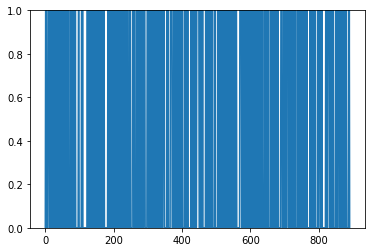

In [77]:
plt.plot(data.iloc[:,0],scaley=False)
#plot에 예기치 않는 놈이 있다?
#*args x는 x축에 입력될 데이터, y는 y축에 들어갈 데이터, x는 선택이지만 y는 반드시 들어가야함
#scalex와 scaley는 자동으로 크기 조절해주는거 의미 기본 true 되어있음 근데 임마는 왜이럴까나

(0.0, 100.0)

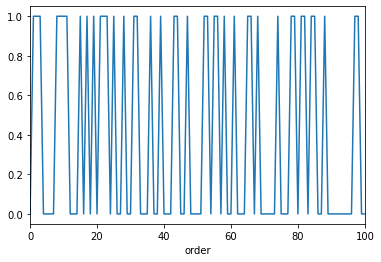

In [169]:
plt.plot(data.iloc[:,0],scalex=False)
plt.xlabel('order')
plt.xlim([0, 100])
#x를 따로 지정해주지 않아서 인덱스가 x가 됨 ,y는 서바이벌 0or 1임을 알수 있음..ㅎ

데이터 슬라이싱!!!

In [93]:
data.loc[1:15] #왼쪽:찾을행, # 슬라이싱이랑 다르게 시작부터 이하임 ㅎㅎ 별로 중요한 건 아니데 그냥
#아 그리고 안에 트루인 행을 찾을수 있음 그건 밑에 자세히!

,Survived,Pclass,Age,Parch,Fare
1,1,1,38.0,0,71.2833
2,1,3,26.0,0,7.9250
3,1,1,35.0,0,53.1000
4,0,3,35.0,0,8.0500
5,0,3,NaN,0,8.4583
6,0,1,54.0,0,51.8625
7,0,3,2.0,1,21.0750
8,1,3,27.0,2,11.1333
9,1,2,14.0,0,30.0708
10,1,3,4.0,1,16.7000


In [122]:
data.loc[0:14,'Survived'] #왼쪽 행정보, 오른쪽 열정보!

pandas.core.series.Series

In [95]:
data.loc[:,"Survived",'Pclass'] #왼쪽:찾을행, 오른쪽 찾을 열

IndexingError: Too many indexers

In [133]:
data.iloc[:,3:5]

,Parch,Fare
0,0,7.2500
1,0,71.2833
2,0,7.9250
3,0,53.1000
4,0,8.0500
...,...,...
886,0,13.0000
887,0,30.0000
888,2,23.4500
889,0,30.0000


In [113]:
x=data.iloc[0,1:6]
type(x)

pandas.core.series.Series

TypeError: plot got an unexpected keyword argument 'x'

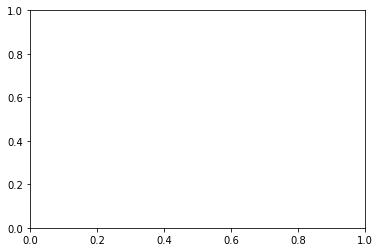

In [128]:
plt.plot(x=data.loc[:,'Age'], y=data.loc[:,'Survived'])

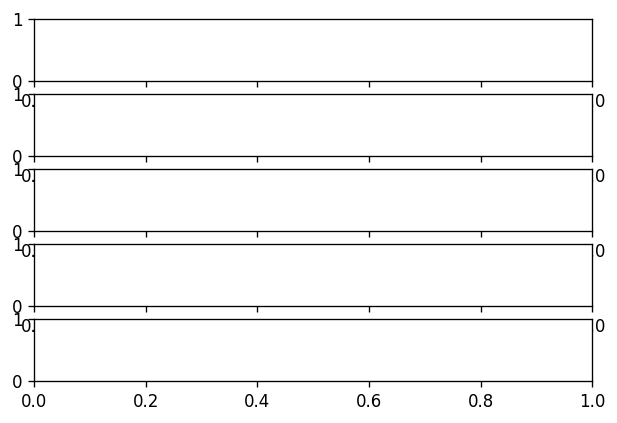

In [134]:
a,b =plt.subplots(nrows=5,ncols=1,dpi=120)
#nrwos : 행개수, ncols 열개수 5*1 , dpi 해상도 의미 높으면 좋겠지만 그러면 용량이 많이 먹겠죠??

AxesSubplot(0.125,0.749828;0.775x0.130172)
AxesSubplot(0.125,0.593621;0.775x0.130172)
AxesSubplot(0.125,0.437414;0.775x0.130172)
AxesSubplot(0.125,0.281207;0.775x0.130172)
AxesSubplot(0.125,0.125;0.775x0.130172)


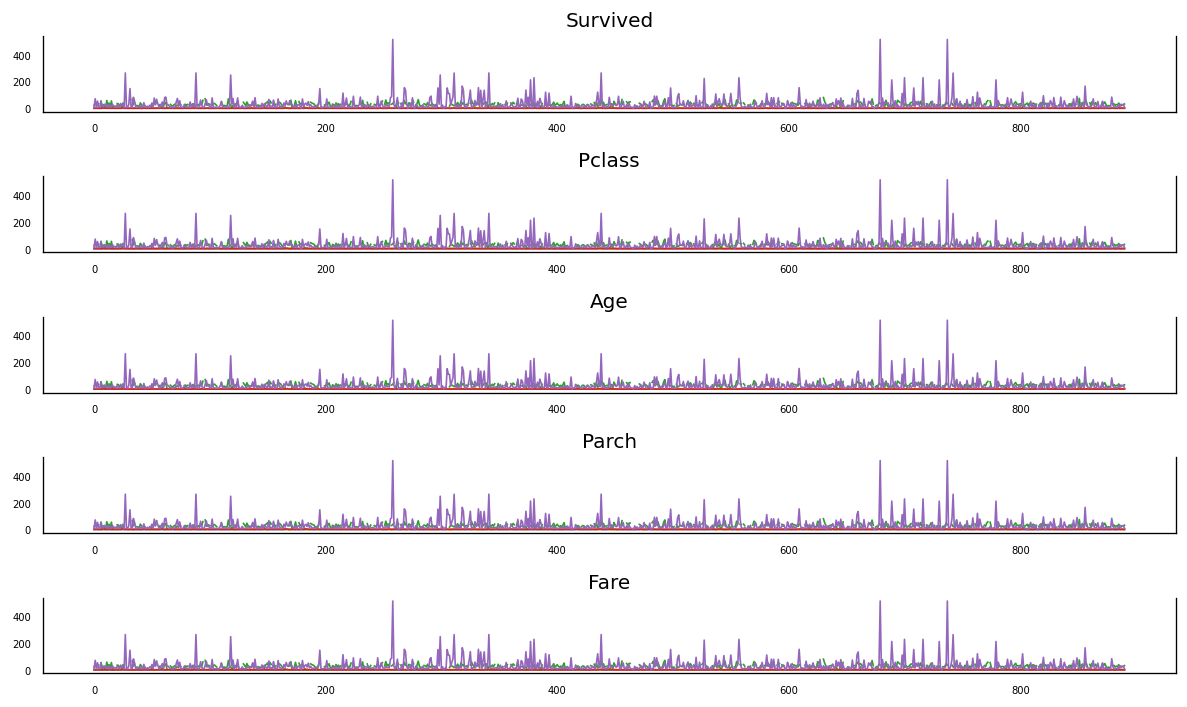

In [25]:

fig, axes = plt.subplots(nrows=5, ncols=1, dpi=120, figsize=(10,6))

for i, ax in enumerate(axes.flatten()):
# 
# ([[2,3],
#   [4,5],
#   [6,7]]) 2->3->4->5->6->7 이걸 축에 따라 
#  실은 5,1이라 0-1-2-3-4순으로 가서 포문만 있으면 되긴하지만 걍 많이쓰니까

    ax.plot(data, linewidth=1)
    # Decorations
    ax.set_title(data.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [164]:
data_corr= data.corr()
data_corr

,Survived,Pclass,Age,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.189119,0.096067
Parch,0.081629,0.018443,-0.189119,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.216225,1.000000


<AxesSubplot:>

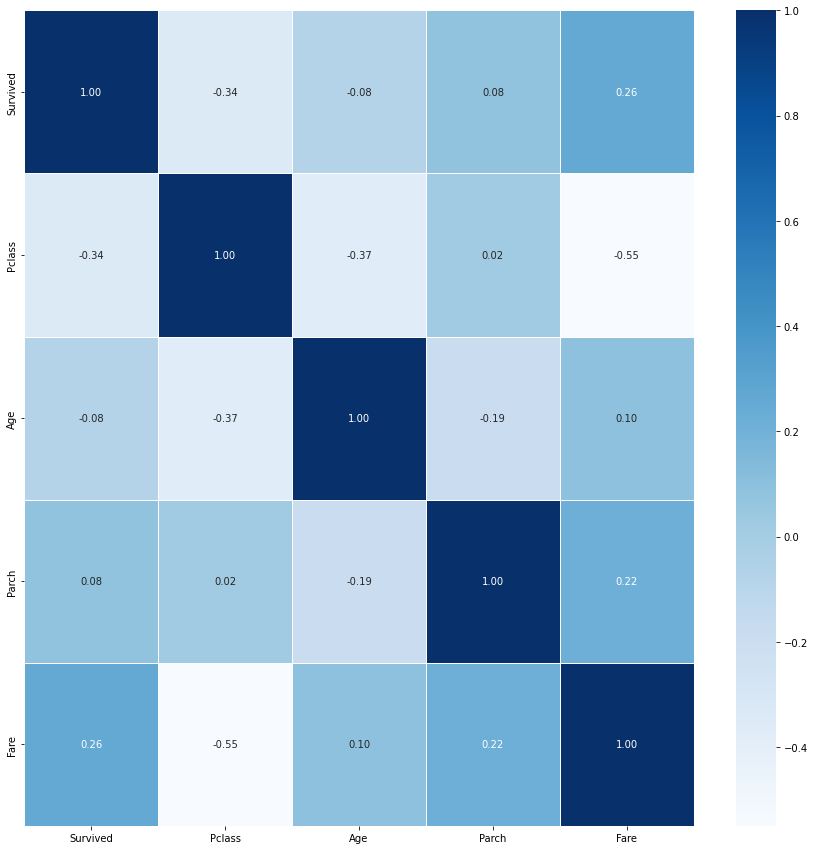

In [165]:
plt.figure(figsize=(15,15))
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

#음이드 양이든 1에 가까울 수록 경향성이 비슷하다..벗 임마는..!ㅎ 선형회귀보단 디시젼 트리가 더 적합할 수도

In [136]:
value_counts = titanic_df['Pclass'].value_counts()
value_counts = titanic_df['Survived'].value_counts()
value_counts = titanic_df['Cabin'].value_counts()
value_counts
#Cabin도 중요한 데이터이지만.. 별로 없어서 아디오스


B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

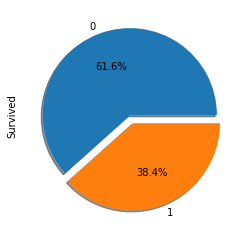

In [ ]:
titanic_df["Survived"].value_counts().plot.pie( explode=[0,0.1], autopct='%1.1f%%', shadow=True)
plt.show()

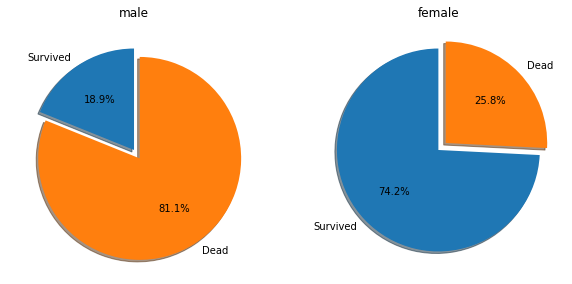

In [154]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Dead'
#남성 생존자 사이즈 109, 468 얼핏 4배 오케이
sizes_m = [len(titanic_df.loc[ (titanic_df["Sex"]=='male') & (titanic_df["Survived"]==1)]), \
         len(titanic_df.loc[ (titanic_df["Sex"]=='male')& (titanic_df["Survived"]==0)]) ]
#여성 생존자 친구 사이즈
sizes_f = [len(titanic_df.loc[ (titanic_df["Sex"]=='female') & (titanic_df["Survived"]==1)]), \
         len(titanic_df.loc[ (titanic_df["Sex"]=='female')& (titanic_df["Survived"]==0)]) ]

explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [161]:
titanic_df.loc[(titanic_df["Sex"]=='female') & (titanic_df["Survived"]==1)]
# titanic_df.loc[titanic_df["Sex"]=='male']


,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
875,876,1,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S


In [166]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)
#p 1 : 0 1 0 1 0 1 1 1, p2:  0 1 01 10 1 , p3: 0, 1, 0 ,1 , 0, 1
titanic_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

KeyError: "['Pclass'] not in index"

In [ ]:
titanic_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
titanic_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
#siblings / spouses aboard the Titanic.  자녀 혹은 배우자랑 탄 녀석들..!, 많을 수록 아디오스...

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
pd.crosstab(titanic_df.Pclass,titanic_df.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


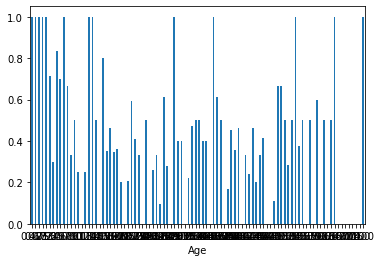

In [ ]:
titanic_df.groupby('Age').mean()['Survived'].plot(kind = 'bar',rot = 0)
# plt.plot() group 판다스도 ploㅅ 을 지원한다~
plt.show()

In [153]:
# one-hot-encoding을 이용해 치환 성별데이터를 바이너리 값으로 변환
pclass_train_dummies = pd.get_dummies(data['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

KeyError: 'Pclass'

In [142]:
# one-hot-encoding을 이용해 치환 성별데이터를 바이너리 값으로 변환
pclass_train_dummies = pd.get_dummies(titanic_df['Pclass'])
pclass_test_dummies = pd.get_dummies(test_df['Pclass'])

titanic_df.drop(['Pclass'], axis=1, inplace=True)
test_df.drop(['Pclass'], axis=1, inplace=True)

pclass_train_dummies.columns = ['First', 'Second', 'Third']
pclass_test_dummies.columns = ['First', 'Second', 'Third']

train_df = titanic_df.join(pclass_train_dummies)
test_df = test_df.join(pclass_test_dummies)

In [150]:
len(titanic_df.loc[ (titanic_df["Sex"]=='male')& (titanic_df["Survived"]==0)])

468

In [151]:
pclass_train_dummies

,First,Second,Third
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0
